✅ Dataset cargado
🟦 X shape: (27000, 64, 64, 3)
🟥 y shape: (27000,)
📚 Clases: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
                      precision    recall  f1-score   support

          AnnualCrop       0.65      0.70      0.67       600
              Forest       0.84      0.90      0.87       600
HerbaceousVegetation       0.61      0.55      0.58       600
             Highway       0.51      0.29      0.37       500
          Industrial       0.71      0.88      0.78       500
             Pasture       0.70      0.83      0.76       400
       PermanentCrop       0.46      0.39      0.42       500
         Residential       0.54      0.65      0.59       600
               River       0.66      0.65      0.65       500
             SeaLake       0.95      0.89      0.92       600

            accuracy                           0.67      5400
           macro avg       0.66      0.

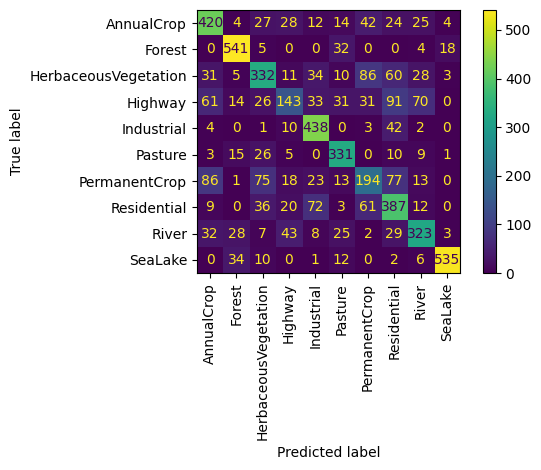

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


import sys
import os

# Ruta absoluta a la carpeta raíz (donde está la carpeta "scripts")
root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Subís un nivel
sys.path.append(root_path)

from datasets.cargar_eurosat import cargar_dataset_eurosat

# Cargar imágenes y etiquetas
X, y, clases = cargar_dataset_eurosat("../datasets/EuroSAT")

print("✅ Dataset cargado")
print("🟦 X shape:", X.shape)
print("🟥 y shape:", y.shape)
print("📚 Clases:", clases)

# Aplanar imágenes para usar modelo clásico
X_flat = X.reshape((X.shape[0], -1))

# Split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, stratify=y, random_state=42)

# Modelo baseline
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=clases))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases, xticks_rotation=90)
plt.tight_layout()
plt.show()


📦 Dataset EuroSAT cargado: X=(27000, 64, 64, 3), y=(27000,)

🚀 Técnica de sobremuestreo: SMOTE

⚙️ Clasificador: Random Forest
                      precision    recall  f1-score   support

          AnnualCrop       0.56      0.64      0.59       600
              Forest       0.91      0.89      0.90       600
HerbaceousVegetation       0.67      0.52      0.59       600
             Highway       0.47      0.26      0.33       500
          Industrial       0.66      0.92      0.77       500
             Pasture       0.66      0.81      0.72       400
       PermanentCrop       0.48      0.38      0.42       500
         Residential       0.59      0.71      0.65       600
               River       0.52      0.56      0.54       500
             SeaLake       0.96      0.85      0.90       600

            accuracy                           0.66      5400
           macro avg       0.65      0.65      0.64      5400
        weighted avg       0.65      0.66      0.65      5400



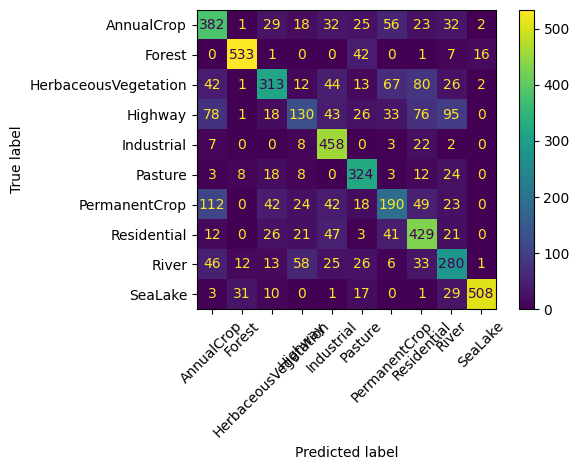


🚀 Técnica de sobremuestreo: BorderlineSMOTE

⚙️ Clasificador: Random Forest
                      precision    recall  f1-score   support

          AnnualCrop       0.56      0.62      0.59       600
              Forest       0.90      0.89      0.89       600
HerbaceousVegetation       0.67      0.51      0.58       600
             Highway       0.45      0.29      0.35       500
          Industrial       0.66      0.90      0.76       500
             Pasture       0.64      0.81      0.72       400
       PermanentCrop       0.44      0.37      0.40       500
         Residential       0.59      0.70      0.64       600
               River       0.52      0.54      0.53       500
             SeaLake       0.95      0.84      0.89       600

            accuracy                           0.65      5400
           macro avg       0.64      0.65      0.64      5400
        weighted avg       0.65      0.65      0.64      5400



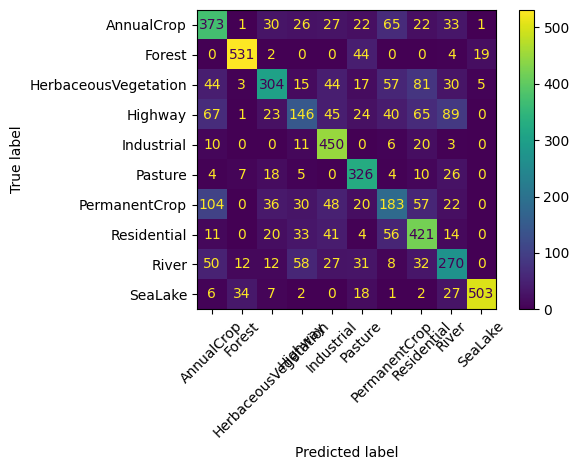


🚀 Técnica de sobremuestreo: PC-SMOTE
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600

⚙️ Clasificador: Random Forest
                      precision    recall  f1-score   support

          AnnualCrop       0.61      0.39      0.48       600
              Forest       0.92      0.87      0.90       600
HerbaceousVegetation       0.75      0.29      0.42       600
             Highway       0.43      0.24      0.31       500
          Industrial       0.54      0.91      0.67       500
             Pasture       0.63      0.78      0.70       400
       PermanentCrop       0.34      0.39      0.36       500
         Residential       0.70      0.42      0.53       600
      

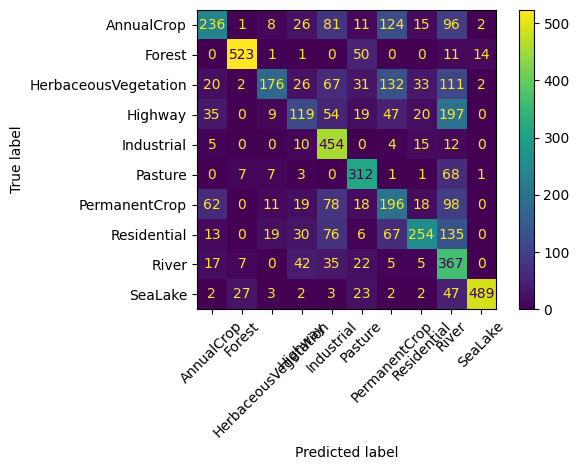

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.decomposition import PCA

# Agregamos la ruta raíz para importar módulos personalizados
root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_path)

from scripts.pc_smote import PCSMOTE  # Asegurate de que está en la carpeta scripts


# Cargar EuroSAT
from datasets.cargar_eurosat import cargar_dataset_eurosat
X, y, clases = cargar_dataset_eurosat("../datasets/EuroSAT")
print(f"📦 Dataset EuroSAT cargado: X={X.shape}, y={y.shape}")

# Aplanar imágenes para usar modelos clásicos
X_flat = X.reshape((X.shape[0], -1))

# Separar conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, stratify=y, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Técnicas de sobremuestreo
tecnicas = {
    # "SMOTE": SMOTE(random_state=42),
    # # "ADASYN": ADASYN(random_state=42),
    # "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "PC-SMOTE": PCSMOTE(random_state=42, percentil_densidad=50, modo_espacial='3d')
}

# Modelos a evaluar
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "SVM": SVC(),
    # "KNN": KNeighborsClassifier(n_neighbors=5),
    # "SVM": SVC(kernel='rbf', probability=True),
    # "GradientBoosting": GradientBoostingClassifier()    
}

# Evaluar cada combinación
for nombre_tecnica, sampler in tecnicas.items():
    print(f"\n🚀 Técnica de sobremuestreo: {nombre_tecnica}")

    if hasattr(sampler, "fit_resample_multiclass"):
        X_res, y_res = sampler.fit_resample_multiclass(X_train_pca, y_train)
    else:
         X_res, y_res = sampler.fit_resample(X_train_pca, y_train)

    for nombre_modelo, modelo in modelos.items():
        print(f"\n⚙️ Clasificador: {nombre_modelo}")
        modelo.fit(X_res, y_res)
        y_pred = modelo.predict(X_test_pca)

        print(classification_report(y_test, y_pred, target_names=clases))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases, xticks_rotation=45)
        plt.tight_layout()
        plt.show()



📦 Dataset EuroSAT cargado: X=(27000, 64, 64, 3), y=(27000,)

🔍 Probar con densidad=25, riesgo=25, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4271


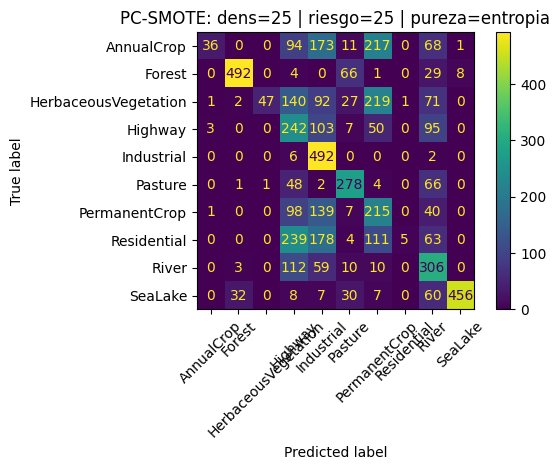


🔍 Probar con densidad=25, riesgo=25, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5976


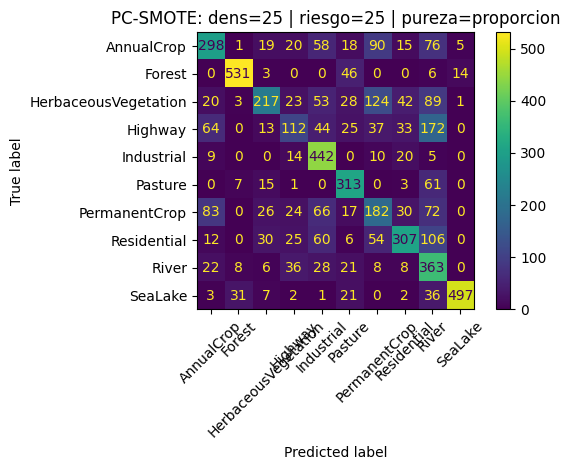


🔍 Probar con densidad=25, riesgo=50, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4194


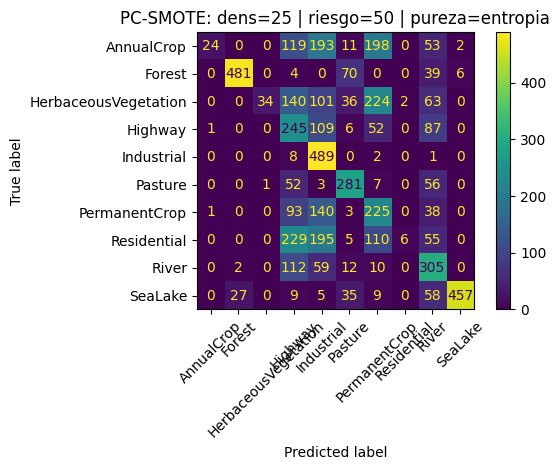


🔍 Probar con densidad=25, riesgo=50, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5853


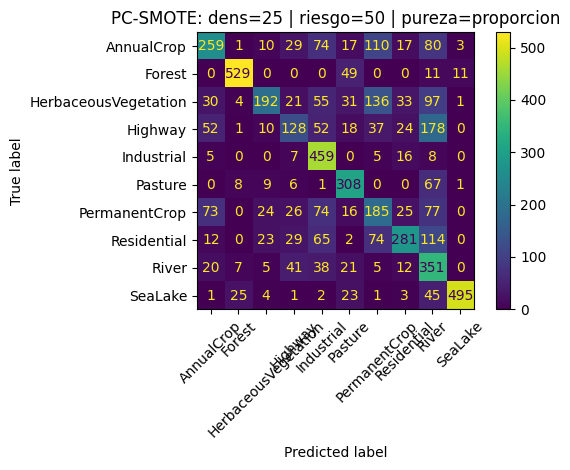


🔍 Probar con densidad=25, riesgo=75, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4148


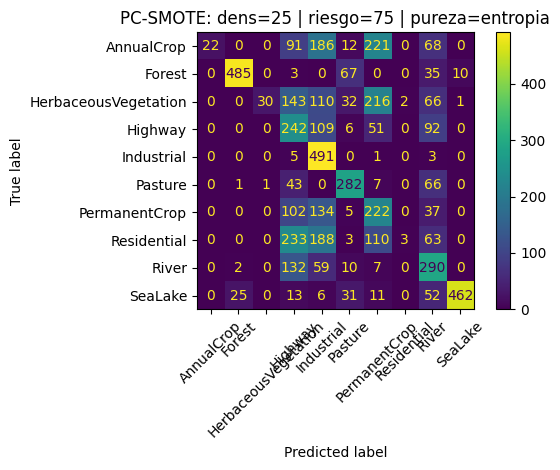


🔍 Probar con densidad=25, riesgo=75, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5727


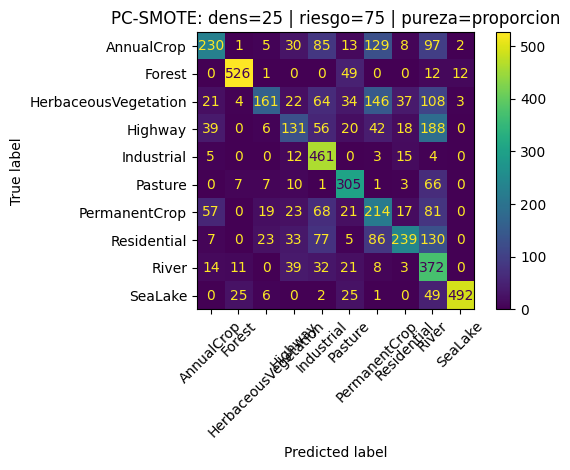


🔍 Probar con densidad=50, riesgo=25, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4271


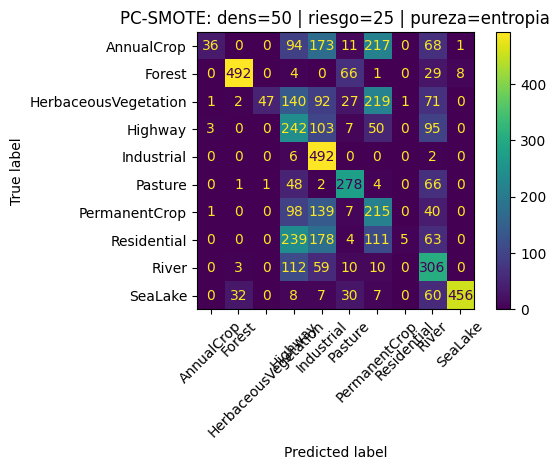


🔍 Probar con densidad=50, riesgo=25, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5976


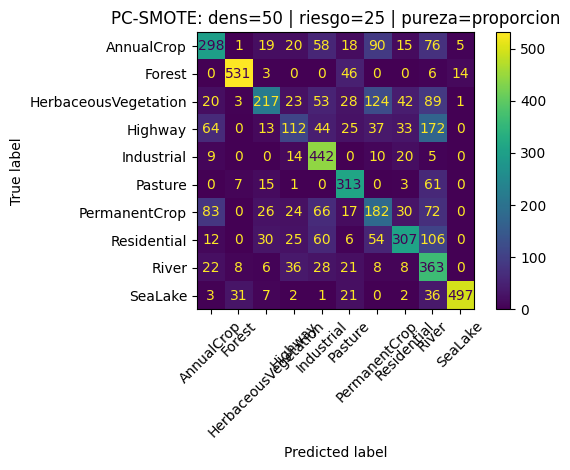


🔍 Probar con densidad=50, riesgo=50, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4194


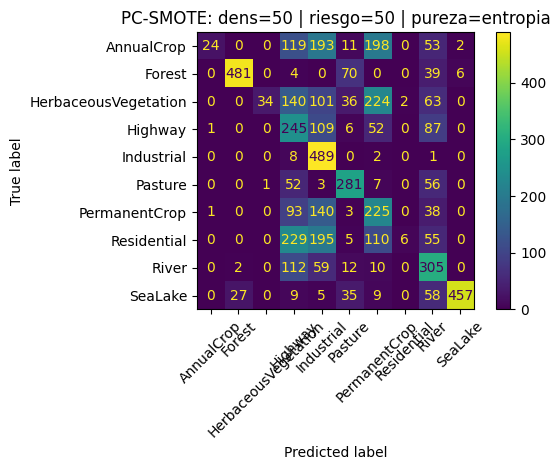


🔍 Probar con densidad=50, riesgo=50, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5853


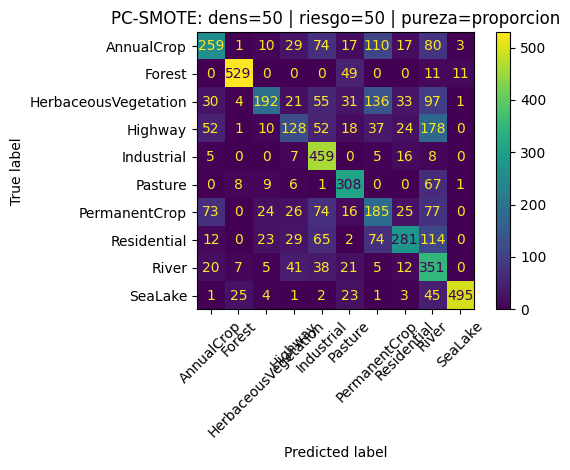


🔍 Probar con densidad=50, riesgo=75, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4148


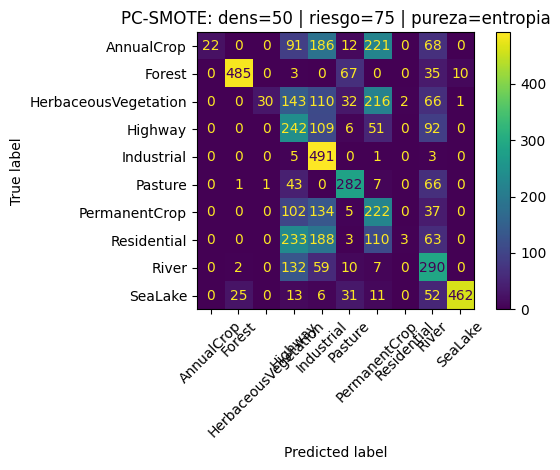


🔍 Probar con densidad=50, riesgo=75, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5727


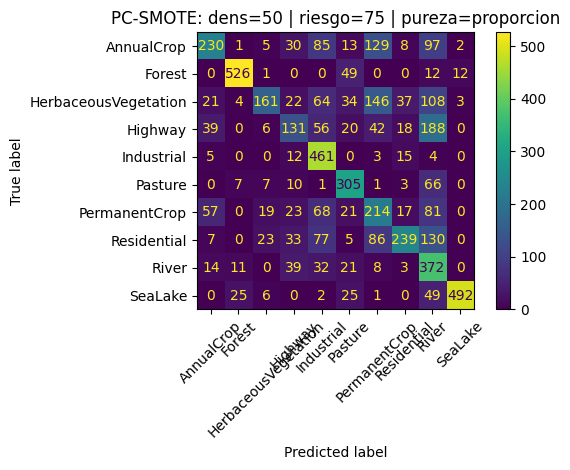


🔍 Probar con densidad=75, riesgo=25, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4271


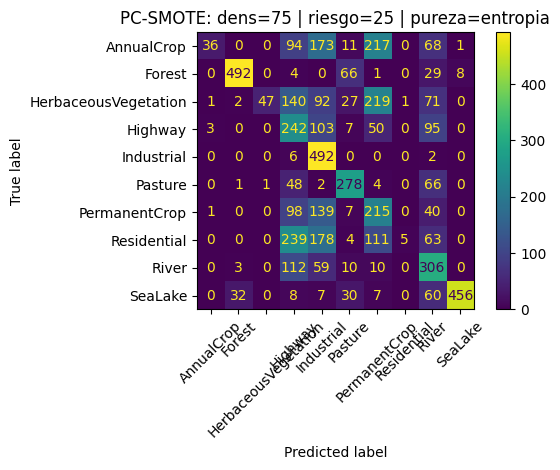


🔍 Probar con densidad=75, riesgo=25, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5976


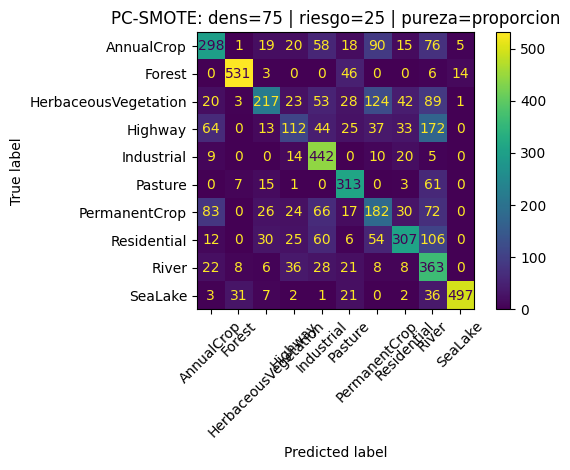


🔍 Probar con densidad=75, riesgo=50, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4194


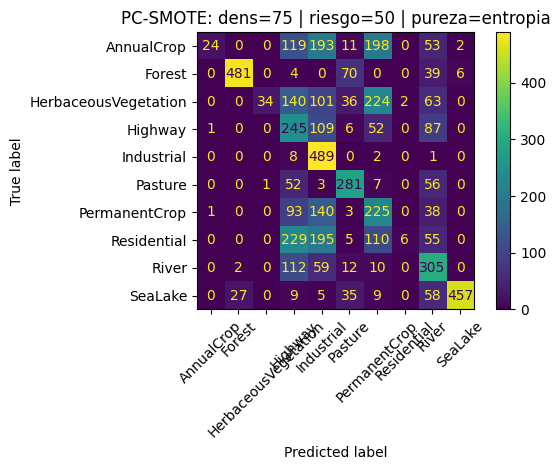


🔍 Probar con densidad=75, riesgo=50, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5853


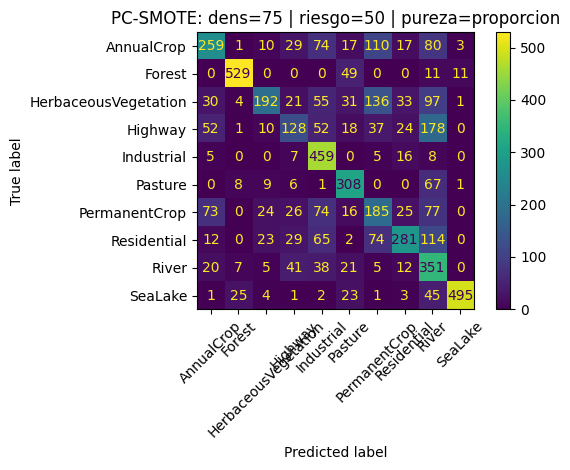


🔍 Probar con densidad=75, riesgo=75, pureza='entropia'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.4148


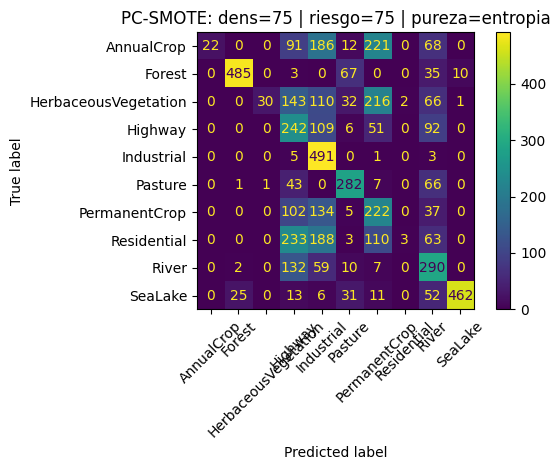


🔍 Probar con densidad=75, riesgo=75, pureza='proporcion'
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 1600
📌 Total muestras mayoritarias: 20000
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
📌 Total muestras minoritarias: 2000
📌 Total muestras mayoritarias: 19600
✅ F1-score ponderado: 0.5727


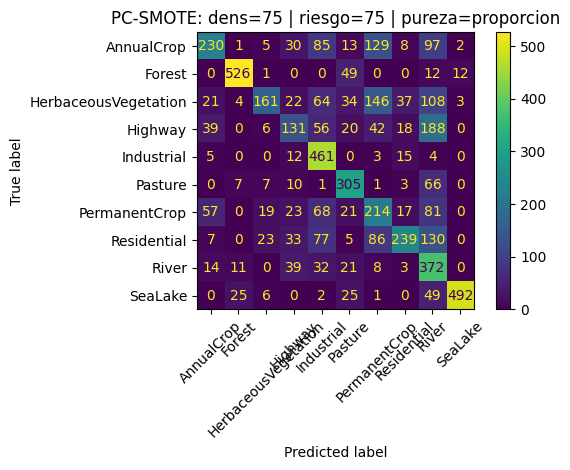


=== 🏁 Mejores combinaciones ===
 densidad  riesgo     pureza  f1_score
       25      25 proporcion  0.597636
       50      25 proporcion  0.597636
       75      25 proporcion  0.597636
       75      50 proporcion  0.585291
       50      50 proporcion  0.585291
       25      50 proporcion  0.585291
       50      75 proporcion  0.572680
       75      75 proporcion  0.572680
       25      75 proporcion  0.572680
       25      25   entropia  0.427071

📝 Resultados guardados en: ../resultados/pcsmote_grid_search.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Agregamos la ruta raíz para importar módulos personalizados
root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_path)

from scripts.pc_smote import PCSMOTE
from datasets.cargar_eurosat import cargar_dataset_eurosat

# Cargar EuroSAT
X, y, clases = cargar_dataset_eurosat("../datasets/EuroSAT")
print(f"📦 Dataset EuroSAT cargado: X={X.shape}, y={y.shape}")

# Aplanar imágenes y separar conjunto
X_flat = X.reshape((X.shape[0], -1)).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, stratify=y, random_state=42)

# PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Clasificador fijo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Parámetros de grilla
percentiles_densidad = [25, 50, 75]
percentiles_riesgo = [25, 50, 75]
criterios_pureza = ['entropia', 'proporcion']

# Resultados
resultados = []

# Grid search manual
for pdens in percentiles_densidad:
    for priesgo in percentiles_riesgo:
        for criterio in criterios_pureza:
            print(f"\n🔍 Probar con densidad={pdens}, riesgo={priesgo}, pureza='{criterio}'")

            # Instanciar PC-SMOTE con esta configuración
            sampler = PCSMOTE(
                random_state=42,
                percentil_densidad=pdens,
                percentil_dist=priesgo,
                criterio_pureza=criterio,
                modo_espacial='3d'
            )

            # Sobremuestreo
            try:
                if hasattr(sampler, "fit_resample_multiclass"):
                    X_res, y_res = sampler.fit_resample_multiclass(X_train_pca, y_train)
                else:
                    X_res, y_res = sampler.fit_resample(X_train_pca, y_train)

                # Entrenamiento y predicción
                modelo.fit(X_res, y_res)
                y_pred = modelo.predict(X_test_pca)

                # Métricas
                f1 = f1_score(y_test, y_pred, average='weighted')
                print(f"✅ F1-score ponderado: {f1:.4f}")

                resultados.append({
                    'densidad': pdens,
                    'riesgo': priesgo,
                    'pureza': criterio,
                    'f1_score': f1
                })

                # Matriz de confusión (opcional)
                ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clases, xticks_rotation=45)
                plt.title(f"PC-SMOTE: dens={pdens} | riesgo={priesgo} | pureza={criterio}")
                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"⚠️ Error durante ejecución: {e}")
                resultados.append({
                    'densidad': pdens,
                    'riesgo': priesgo,
                    'pureza': criterio,
                    'f1_score': np.nan,
                    'error': str(e)
                })

# Mostrar resumen
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='f1_score', ascending=False)
print("\n=== 🏁 Mejores combinaciones ===")
print(df_resultados.head(10).to_string(index=False))

# Guardar resultados en CSV
output_path = "../resultados/pcsmote_grid_search.csv"
df_resultados.to_csv(output_path, index=False)
print(f"\n📝 Resultados guardados en: {output_path}")
